# Курс по анализу данных

На этой странице будут представлены домашние задания и занятия по курсу Анализа данных в ВШЭ

Данная страница подготовлена студентом Андреем Голубевым

Вы можете увидеть следующие пометки - " *примеч.* " от автора страницы, поясняющие некоторую информацию из третьих источников

#### Примечания:

1. В данной работе будет часто использоваться слово pub (*перевод*: паб, бар)
2. Комментарии к коду (и не только) в данной работе могут быть на анлийском языке



### Dataset

Ссылка на dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Краткое описание (переведено с описания на странице kaggle):

> Данные собраны из онлайн опроса про Армянские пабы

> Данный dataset включает поведенческую, психографическую, географическую и демографическую информацию о пабах в Армении

> Эти данные предназначались лишь в образовательных целях в рамках независимого проекта, организованного студентами Американского Университета Армении, 

> Представленные данные уникальны, так как сектор пабов в Армении не подвергался исследованию на текущий момент (*примеч.:* подозреваю, на момент первого выкладывания этого датасета в kaggle)

Данные были собраны и подготовлены:
> [Erik Hambardzumyan](https://www.kaggle.com/erikhambardzumyan)



#### Описание датасета:

- `Timestamp (string)` - дата и время проводимого опроса

- `Age (numeric)` - возраст опрашиваемого 

- `Gender (string)` - пол

- `Income (numeric)` - примерный месячный доход (в валюте Армении)

- `Occupation (string)` - должность

- `Fav_Pub (string)` - любимый бар опрашиваемого

- `WTS (numeric)` - максимальная готовность (*примеч.:* в денежном эквиваленте) потратить деньги в баре (*примеч.:* от willingness to spend)

- `Freq (string)` - частота посещения баров

- `Prim_Imp (string)` - главная компонента (feature) для опрашиваемого при посещении бара

- `Sec_Imp (string)` - вторичная компонента (feature) для опрашиваемого при посещении бара

- `Stratum (string)` - "страта" опрашиваемого (*примеч.:* имеется в виду "региональное" место жительства, например, столица, сельская местность)

- `Lifestyle (string)` - стиль жизни

- `Occasions (string)` - событие, которое побуждает опрашиваемого ходить в бар чаще всего


#### Заметки:

Предложенный датасет содержал проблему, связанную с наличием пробелов после названий некоторых колонок ([ссылка на kaggle discussions](https://www.kaggle.com/erikhambardzumyan/pubs/discussion/39950))

> Оригинальный датасет был изменен **вручную** для исправления этого недостатка. Сам измененный датасет расположен в одной директории с этим файлом

> Из личных предпочтений: я больше предпочитаю имена колонок с маленькой буквы, поэтому все колонки были изменены **через python на "lowercase"**

In [796]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Прочтение данных из `.csv`:

In [797]:
raw_data = pd.read_csv("armenian_pubs.csv", sep=",", engine="python")
raw_data.columns = map(str.lower, raw_data.columns) # all columns to lower case
type(raw_data)

pandas.core.frame.DataFrame

Проверка:

In [798]:
raw_data

,timestamp,age,gender,income,occupation,fav_pub,wts,freq,prim_imp,sec_imp,stratum,lifestyle,occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends
5,2017/02/25 10:55:39 PM GMT+4,19,Male,90000.0,Student,Station,2000.0,Several times a week,Environment,Menu,Capital,Adventure/traveling/exploring,Hang outs with friends
6,2017/02/25 10:55:41 PM GMT+4,18,Female,0.0,Student,Irish,1000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
7,2017/02/25 10:55:45 PM GMT+4,19,Female,0.0,Student,Station,2000.0,Several times in a month,Environment,Pricing,Capital,"Busy(student life, work)",Hang outs with friends
8,2017/02/25 10:56:17 PM GMT+4,19,Male,80000.0,Student + working,I don't like pubs,10000.0,rarely (once two week/or a month),Environment,Music,Capital,Adventure/traveling/exploring,Hang outs with friends
9,2017/02/25 10:56:45 PM GMT+4,19,Male,150000.0,Student,Irish,3000.0,Several times in a month,Environment,Music,Capital,Nightlife,Hang outs with friends


Размер таблицы:

In [799]:
rows, cols = raw_data.shape
print("rows: {} columns: {}".format(rows, cols))

rows: 175 columns: 13


Тип каждой колонки:

In [800]:
cols = list(raw_data.columns)
types = {}
for col in cols:
    types[col] = raw_data[col].dtype.name #type(raw_data[col][0])
    pass
types

{'age': 'int64',
 'fav_pub': 'object',
 'freq': 'object',
 'gender': 'object',
 'income': 'float64',
 'lifestyle': 'object',
 'occasions': 'object',
 'occupation': 'object',
 'prim_imp': 'object',
 'sec_imp': 'object',
 'stratum': 'object',
 'timestamp': 'object',
 'wts': 'float64'}

In [801]:
raw_data[['income', 'fav_pub']][:10]

,income,fav_pub
0,100000.0,Station
1,50000.0,Calumet
2,100000.0,Liberty
3,0.0,Calumet
4,130000.0,Liberty
5,90000.0,Station
6,0.0,Irish
7,0.0,Station
8,80000.0,I don't like pubs
9,150000.0,Irish


Базовая статистика для числовых колонок:

In [802]:
raw_data.describe()

,age,income,wts
count,175.000000,1.740000e+02,172.000000
mean,19.548571,1.101977e+05,4831.395349
std,2.770262,3.576027e+05,4323.951020
min,16.000000,0.000000e+00,0.000000
25%,18.000000,1.000000e+02,2000.000000
50%,19.000000,5.500000e+04,4000.000000
75%,20.000000,1.000000e+05,5000.000000
max,41.000000,4.500000e+06,30000.000000


Базовая статистика для не числовых колонок:

In [803]:
raw_data.describe(include=["object"])

,timestamp,gender,occupation,fav_pub,freq,prim_imp,sec_imp,stratum,lifestyle,occasions
count,175,175,175,168,175,175,175,175,169,173
unique,175,2,7,44,3,4,4,3,10,7
top,2017/02/25 11:22:14 PM GMT+4,Female,Student,Calumet,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
freq,1,102,122,27,94,122,66,139,78,138


Построение scatter matrix:

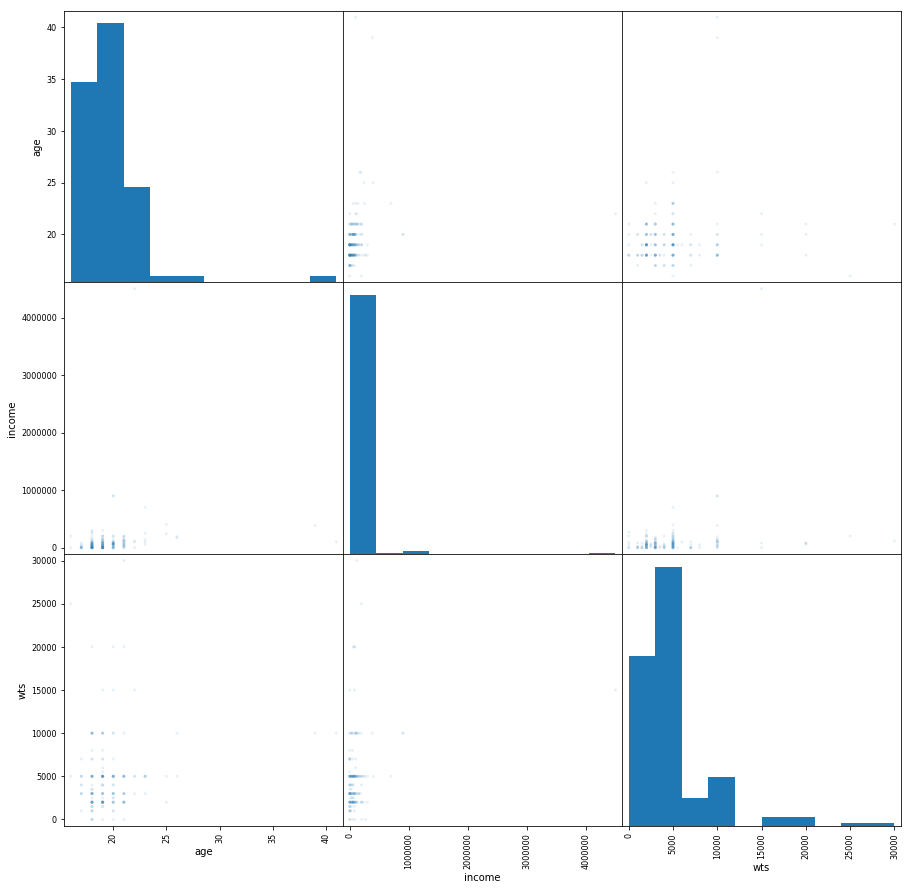

In [804]:
from pandas.plotting import scatter_matrix
scatter_matrix(raw_data, alpha=0.1, figsize=(15, 15))
pass

Корреляция между данными (числовые колонки):

In [805]:
raw_data.corr()

,age,income,wts
age,1.000000,0.163399,0.134111
income,0.163399,1.000000,0.228340
wts,0.134111,0.228340,1.000000


Из полученной корреляции: возраст, доход и готовность потратить деньги слабо связаны между собой (корреляция по модулю <= 0.25)

*Примеч.* немного странно, что нет сильной корреляции, ведь логично предположить:

- С возрастом заработок вырастает -> прямая зависимость

- Большая сумма трат в баре должна как-то коррелировать с молодостью (или же с высоким доходом) -> обратная/прямая зависимость

Посмотрим отдельно на зависимость между возрастом и доходом:

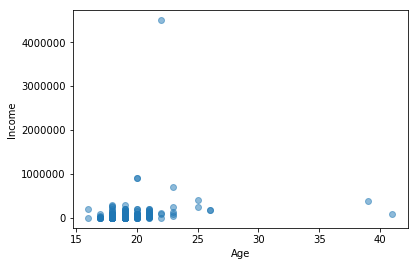

In [806]:
plt.plot(raw_data['age'], raw_data['income'], 'o', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income')
pass

Смущает то, что возраст колеблется в интервале [15; 27] (с некоторыми, предположим, выбросами)

Посчитаем средние возраст и доход отдельно:

In [807]:
mean_values = {}
mean_values["age"] = raw_data['age'].mean()
mean_values["income"] = raw_data['income'].mean()
# convert income to rubles:
mean_values["income_rub"] = mean_values["income"] / 8.29
print(mean_values)

{'age': 19.548571428571428, 'income': 110197.70114942528, 'income_rub': 13292.84694202959}


Итак, средний возраст - 19,5 лет; доход - 13 тыс. руб

Похоже, что данные и правда собраны силами "университета" и, вероятно, их родственниками

> По проведенному "эксперименту" можно предположить, почему корреляция не дала каких-либо ожидаемых результатов:
> 1. Данных слишком мало
> 2. Все данные "сгруппированы" вокруг 20 лет

> \* Полагаем, что у нас "умный" аппарат корреляционного анализа, который не дает псевдо-корректных результатов при наличии различного рода ошибок, допущенных при сборе данных

Посмотрим на графики, показывающие как место жительства влияет на количество денег, которые человек готов потратить в баре, в связке с возрастом

Index(['timestamp', 'age', 'gender', 'income', 'occupation', 'fav_pub', 'wts',
       'freq', 'prim_imp', 'sec_imp', 'stratum', 'lifestyle', 'occasions'],
      dtype='object')
Stratum unique: ['Capital' 'Urban' 'Rural']


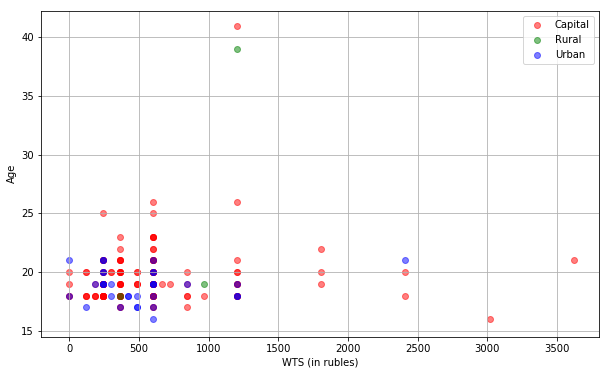

In [808]:
print(raw_data.columns)
print("Stratum unique: " + str(raw_data['stratum'].unique()))

plt.figure(figsize = (10, 6))

cap = str('Capital')
urb = str('Urban')
rur = str('Rural')

plt.scatter([val / 8.29 for val in raw_data[raw_data['stratum'] == cap]['wts']],
            raw_data[raw_data['stratum'] == cap]['age'],
            alpha = 0.5,
            label = cap,
            color = 'r')

plt.scatter([val / 8.29 for val in raw_data[raw_data['stratum'] == rur]['wts']],
            raw_data[raw_data['stratum'] == rur]['age'],
            alpha = 0.5,
            label = rur,
            color = 'g')

plt.scatter([val / 8.29 for val in raw_data[raw_data['stratum'] == urb]['wts']],
            raw_data[raw_data['stratum'] == urb]['age'],
            alpha = 0.5,
            label = urb,
            color = 'b')


plt.xlabel('WTS (in rubles)')
plt.ylabel('Age')
plt.legend()
plt.grid()

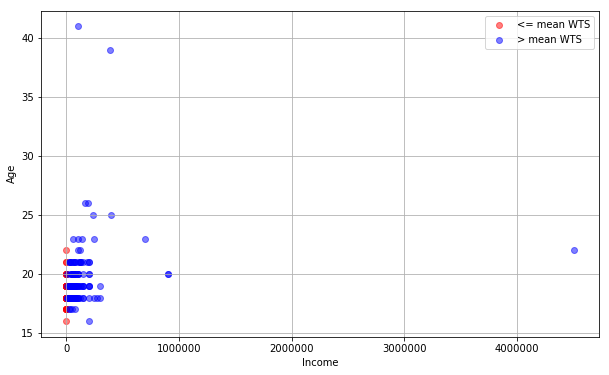

In [809]:
import copy
raw_data_cp = copy.deepcopy(raw_data)
wts_mean = np.mean(raw_data_cp['wts'])
raw_data_cp['wts'] = pd.Series(['C1' if val <= wts_mean else 'C2' for val in raw_data_cp['income']])

plt.figure(figsize = (10, 6))

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C1"]['income']],
            raw_data_cp[raw_data_cp['wts'] == "C1"]['age'],
            alpha = 0.5,
            label = "<= mean WTS",
            color = 'r')

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C2"]['income']],
            raw_data_cp[raw_data_cp['wts'] == "C2"]['age'],
            alpha = 0.5,
            label = "> mean WTS",
            color = 'b')


plt.xlabel('Income')
plt.ylabel('Age')
plt.legend()
plt.grid()

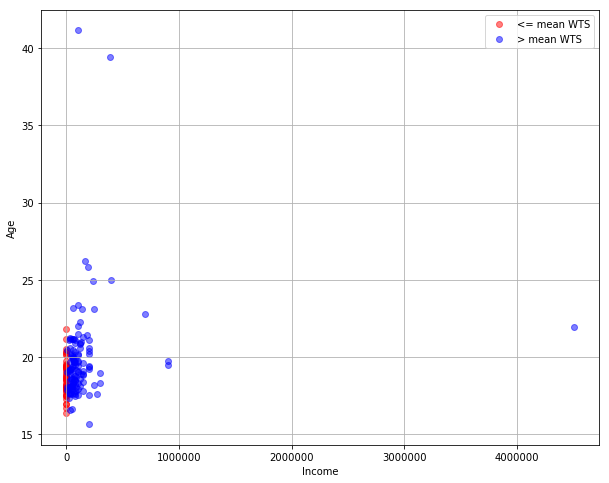

In [810]:
np.random.seed(0)
age_num_rnd = raw_data_cp['age'] + np.random.rand(raw_data_cp.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C1"]['income']],
            age_num_rnd[raw_data_cp['wts'] == "C1"],
            alpha = 0.5,
            label = "<= mean WTS",
            color = 'r')

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C2"]['income']],
            age_num_rnd[raw_data_cp['wts'] == "C2"],
            alpha = 0.5,
            label = "> mean WTS",
            color = 'b')


plt.xlabel('Income')
plt.ylabel('Age')
plt.legend()
plt.grid()

## Задача

Будем искать как зависит WTS (число денег, которые можно потратить в баре) от других факторов.

WTS - интересующий нас параметр, так как хочется понять, что именно имеет решающее значение для каждого человека при формировании 

> Для примера использования на практике: через WTS мы потенциально можем влиять на прибыль нашего бара

## Подготовка данных

Пожалуй, можно выбросить колонку timestamp за ненадобностью в нашей задаче.

Так же выбросить можно и колонку любимых баров:
- в ней приведены только названия баров, а не какие-то качественные или количественные признаки
- при дальнейшей векторизации, мы рискуем получить большое количество малозначащих признаков
- косвенно все бары характеризуются другими параметрами, которые мы оставляем (например, место жительства - место расположения бара или атмосфера бара [как пример значения из первичных/вторичных компонент])

In [811]:
data = raw_data.drop('timestamp', axis=1)
data = data.drop('fav_pub', axis=1)

In [812]:
categorical_cols = [col for col in data.columns if data[col].dtype.name == "object"]
numerical_cols = [col for col in data.columns if data[col].dtype.name != "object"]
print("Categorical: \n" + str(categorical_cols))
print("Numerical: \n" + str(numerical_cols))
print("\nSize of table: " + str(raw_data.shape))

Categorical: 
['gender', 'occupation', 'freq', 'prim_imp', 'sec_imp', 'stratum', 'lifestyle', 'occasions']
Numerical: 
['age', 'income', 'wts']

Size of table: (175, 13)


### Обработка пропусков

Для наших данных будем использовать подстановки для устранения пропусков:

- самое популярное значение - для категориальных признаков
- медиана - для количественных признаков

Делаем имеенно таким образом, так как объем исходных данных уже и без нашего вмешательства невообразимо мал.

In [813]:
print("Numerical:")
print(data[numerical_cols].count())
print("\nCategorical:")
print(data[categorical_cols].count())

# copy-pasted code for possible future reuse:
data = data.fillna(data.median(axis = 0), axis = 0)

Numerical:
age       175
income    174
wts       172
dtype: int64

Categorical:
gender        175
occupation    175
freq          175
prim_imp      175
sec_imp       175
stratum       175
lifestyle     169
occasions     173
dtype: int64


Для количественных признаков все данные заполнены, для категорийных - нет. Надо заполнить пропуски лишь для категорийных признаков.

In [814]:
for col in data[categorical_cols]:
    raw_data[col] = data[col].fillna(data[col].describe().top)
    pass
print(raw_data[categorical_cols].count())

gender        175
occupation    175
freq          175
prim_imp      175
sec_imp       175
stratum       175
lifestyle     175
occasions     175
dtype: int64


In [815]:
data.describe(include = [object])

,gender,occupation,freq,prim_imp,sec_imp,stratum,lifestyle,occasions
count,175,175,175,175,175,175,169,173
unique,2,7,3,4,4,3,10,7
top,Female,Student,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
freq,102,122,94,122,66,139,78,138


### Векторизация категориальных признаков

Будет сделано следующее:

1. Для небинарных категориальных признаков:
    - Вместо *N* значений признака будет использоваться *N* признаков со значением 0 или 1 (в зависимости от значения исходного признака), таким образом, получив вектор сумма элементов которого всегда равна 1 (в силу того, что пропуски уже устранены)

2. Для бинарных категориальных признаков:
    - Вместо категории будем использовать число - 0 или 1 соответственно
    
Бинарные:

In [816]:
# store categorical data descriptor:
categorical_descr = data.describe(include=[object])
binary_cols = [col for col in categorical_cols if categorical_descr[col]['unique'] == 2]
print("Binary:")
print(binary_cols)
nonbinary_cols = [col for col in categorical_cols if categorical_descr[col]['unique'] > 2]
print("Non-binary:")
print(nonbinary_cols)

Binary:
['gender']
Non-binary:
['occupation', 'freq', 'prim_imp', 'sec_imp', 'stratum', 'lifestyle', 'occasions']


In [817]:
data.at[data['gender']=='Male', 'gender'] = 0
data.at[data['gender']=='Female', 'gender'] = 1
data['gender'].describe() # dtype is now int64

count     175
unique      2
top         1
freq      102
Name: gender, dtype: int64

Небинарные:

In [818]:
data_nonbinary = pd.get_dummies(data[nonbinary_cols])
print(data_nonbinary.columns)

Index(['occupation_CEO', 'occupation_Entrepreneur / Software Engineer',
       'occupation_Student', 'occupation_Student + working',
       'occupation_Working', 'occupation_Working ', 'occupation_army',
       'freq_Several times a week', 'freq_Several times in a month',
       'freq_rarely (once two week/or a month)', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business, sports, dance',
       'lifestyle_Busy(student life, work)', 'lifestyle_Nightlife',
       'lifestyle_Passive ', 'lifestyle_Rock, punk', 'lifestyle_Sport',
       'lifestyle_Sport, art, traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For listening  good music ',
       'occasions_Hang outs with friends', 'occasions_Never',
    

После вызова `get_dummies` можно заметить, что некоторые колонки не совсем корректны:
- содержат пробелы, запятые и `'`
- содержат символы `(`, `)`, `/`

Попробуем с этим что-то сделать, чтобы избежать дальнейших проблем:
- заменим пробелы на `_`
- удалим все, что идет после `(`
- удалим запятые и `'`

In [819]:
# data_nonbinary.columns
data_nonbinary.columns = map(lambda col: col.split("(")[0], data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.strip(), data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.replace(" ", "_"), data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.replace("'", ""), data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.replace(",", ""), data_nonbinary.columns)
print(data_nonbinary.columns)

Index(['occupation_CEO', 'occupation_Entrepreneur_/_Software_Engineer',
       'occupation_Student', 'occupation_Student_+_working',
       'occupation_Working', 'occupation_Working', 'occupation_army',
       'freq_Several_times_a_week', 'freq_Several_times_in_a_month',
       'freq_rarely', 'prim_imp_Environment', 'prim_imp_Menu',
       'prim_imp_Music', 'prim_imp_Pricing', 'sec_imp_Environment',
       'sec_imp_Menu', 'sec_imp_Music', 'sec_imp_Pricing', 'stratum_Capital',
       'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_events/parties',
   

После всех этих операций, удалим возможные дупликаты: они могли получиться как и в ходе генерации векторов из признаков, так и после "очистки" названий

In [820]:
# verify we don't have non-unique columns:
# from collections import Counter
# non_uniques = [k for k, v in Counter(data_nonbinary.columns).items() if v > 1]

# print("Non uniques:")
# print(non_uniques)

# # check that all values are unique:
# if len(data_nonbinary.columns) == len(set(data_nonbinary.columns)):
#     print("All values left are unique")
#     pass

data_nonbinary.columns.drop_duplicates()

Index(['occupation_CEO', 'occupation_Entrepreneur_/_Software_Engineer',
       'occupation_Student', 'occupation_Student_+_working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_events/parties',
       'occasions_chem_aycelum']

### Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [821]:
data_without_y = data[['age', 'income']] # исключаем WTS так как он "Y" - не нормализуем
numerical_cols.remove('wts')
data_numerical = data_without_y[numerical_cols]
data_numerical.describe()

,age,income
count,175.000000,1.750000e+02
mean,19.548571,1.098823e+05
std,2.770262,3.565980e+05
min,16.000000,0.000000e+00
25%,18.000000,2.000000e+02
50%,19.000000,5.500000e+04
75%,20.000000,1.000000e+05
max,41.000000,4.500000e+06


In [822]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,income
count,1.750000e+02,1.750000e+02
mean,2.804106e-16,2.882615e-17
std,1.000000e+00,1.000000e+00
min,-1.280952e+00,-3.081405e-01
25%,-5.589982e-01,-3.075796e-01
50%,-1.980215e-01,-1.539052e-01
75%,1.629552e-01,-2.771268e-02
max,7.743466e+00,1.231111e+01


### Объединение всех признаков в одну таблицу

In [823]:
data['wts'].count()

175

In [824]:
data_concat = pd.concat((data_numerical, data_nonbinary, data[binary_cols]), axis=1)
print(data.shape)

(175, 11)


In [825]:
data_concat.describe()

,age,income,occupation_CEO,occupation_Entrepreneur_/_Software_Engineer,occupation_Student,occupation_Student_+_working,occupation_Working,occupation_Working,occupation_army,freq_Several_times_a_week,...,lifestyle_Sport,lifestyle_Sport_art_traveling,lifestyle_Student,occasions_Birthdays,occasions_For_listening__good_music,occasions_Hang_outs_with_friends,occasions_Never,occasions_Nowere,occasions_Special_events/parties,occasions_chem_aycelum
count,1.750000e+02,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2.804106e-16,2.882615e-17,0.005714,0.005714,0.697143,0.228571,0.051429,0.005714,0.005714,0.114286,...,0.062857,0.005714,0.005714,0.080000,0.005714,0.788571,0.011429,0.005714,0.091429,0.005714
std,1.000000e+00,1.000000e+00,0.075593,0.075593,0.460812,0.421117,0.221504,0.075593,0.075593,0.319071,...,0.243402,0.075593,0.075593,0.272072,0.075593,0.409493,0.106597,0.075593,0.289045,0.075593
min,-1.280952e+00,-3.081405e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.589982e-01,-3.075796e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.980215e-01,-1.539052e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.629552e-01,-2.771268e-02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.743466e+00,1.231111e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Формирование X и Y

Так как у нас не было классов изначально, "разобьем" наш параметр WTS на два класса:

Класс 1: WTS <= среднего значения ("мало/средне-тратящие в барах" люди)

Класс 2: WTS > среднего значения ("многотратящие в барах" люди)

In [826]:
X = data_concat
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

In [827]:
print(X.shape)
print(Y.shape)

(175, 41)
(175,)


In [828]:
type(Y)

pandas.core.series.Series

#### Разбиение на обучающую и тестовую выборки

In [829]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

122 53


*Примеч.:* скопировано на будущее

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X, y)`              |  обучение (тренировка) модели на обучающей выборке `X`, `y`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    

# $k$NN

In [830]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10) # run default
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [831]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [832]:
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_train != Y_train_predict)
err_test = np.mean(Y_test != Y_test_predict)

print(err_train, err_test)

err_test2 = 1 - knn.score(X_test, Y_test) # Другой способ
print(err_test2)

0.377049180328 0.566037735849
0.566037735849


###### Получилась большая ошибка:

- Плохо подобраны параметры алгоритма
- Исходная выборка очень маленькая (175 записей), в принципе не стоит ожидать, что алгоритм сможет хорошо предсказывать результат на таком ничтожно малом наборе данных, особенно если мы заходим действительно спрогнозировать какую-то величину (которая не входит в изначальную выборку и находится "далеко" за пределами наших значений)

In [833]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_test_predict))

[[18  5]
 [25  5]]


Из документации о confusion_matrix:

> Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

Таким образом,

$k$NN нашел:
- 9 "true negatives"
- 16 "false negatives"
- 4 "true positives"
- 6 "false positives"

Получается, что с параметрами по умолчанию, наш алгоритм чаще ошибается, чем оказывается прав

#### Подбор параметров

In [834]:
from sklearn.model_selection import GridSearchCV

n_neighbours = []
for i in range(20):
    if (i % 2 != 0):
        n_neighbours.append(i)
        pass
    pass
n_neighbours

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [835]:
knn_default = KNeighborsClassifier()
# using default cross-validation
grid = GridSearchCV(knn_default, param_grid = {'n_neighbors': n_neighbours}, cv=None)
grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [836]:
best_cv_err = 1 - grid.best_score_
best_n_neighbours = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbours)

0.418032786885 5


In [837]:
knn_smart = KNeighborsClassifier(n_neighbors=best_n_neighbours).fit(X_train, Y_train)

err_train_smart = np.mean(Y_train != knn_smart.predict(X_train))
err_test_smart  = np.mean(Y_test  != knn_smart.predict(X_test))

print(err_train_smart, err_test_smart)

0.245901639344 0.566037735849
